In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
test_texts = np.array(test_data['comment_text'])

for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1



In [13]:
import scipy
def add_1(X):
    sub = scipy.sparse.csr_matrix(np.ones(X.shape[0])[:, None])
    
    return scipy.sparse.csr_matrix(scipy.sparse.hstack((X, sub)))

In [14]:
 def predict(X, w):

    ans = np.sign(X * w)
    ans[ans == 0] = 1
    return ans

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

Посмотрим для различных значений min_df у векторизатора:

In [16]:
vect = CountVectorizer(min_df=20, stop_words='english')

In [17]:
train_matrix = vect.fit_transform(train_texts)
test_matrix = vect.transform(test_texts)

In [18]:
train_matrix = add_1(train_matrix)
test_matrix = add_1(test_matrix)

In [19]:
from optimization import GDClassifier

In [ ]:
results_alpha = []
holder_alpha = []
for i in range(1, 51):
    classifier = GDClassifier(step_alpha = i / 10, l2_coef = 0)
    holder_alpha.append(classifier.fit(train_matrix, train_target, trace = True))
    results_alpha.append(classifier.predict(test_matrix))

In [9]:
accuracy_alpha = [accuracy_score(test_target, result) for result in results_alpha]

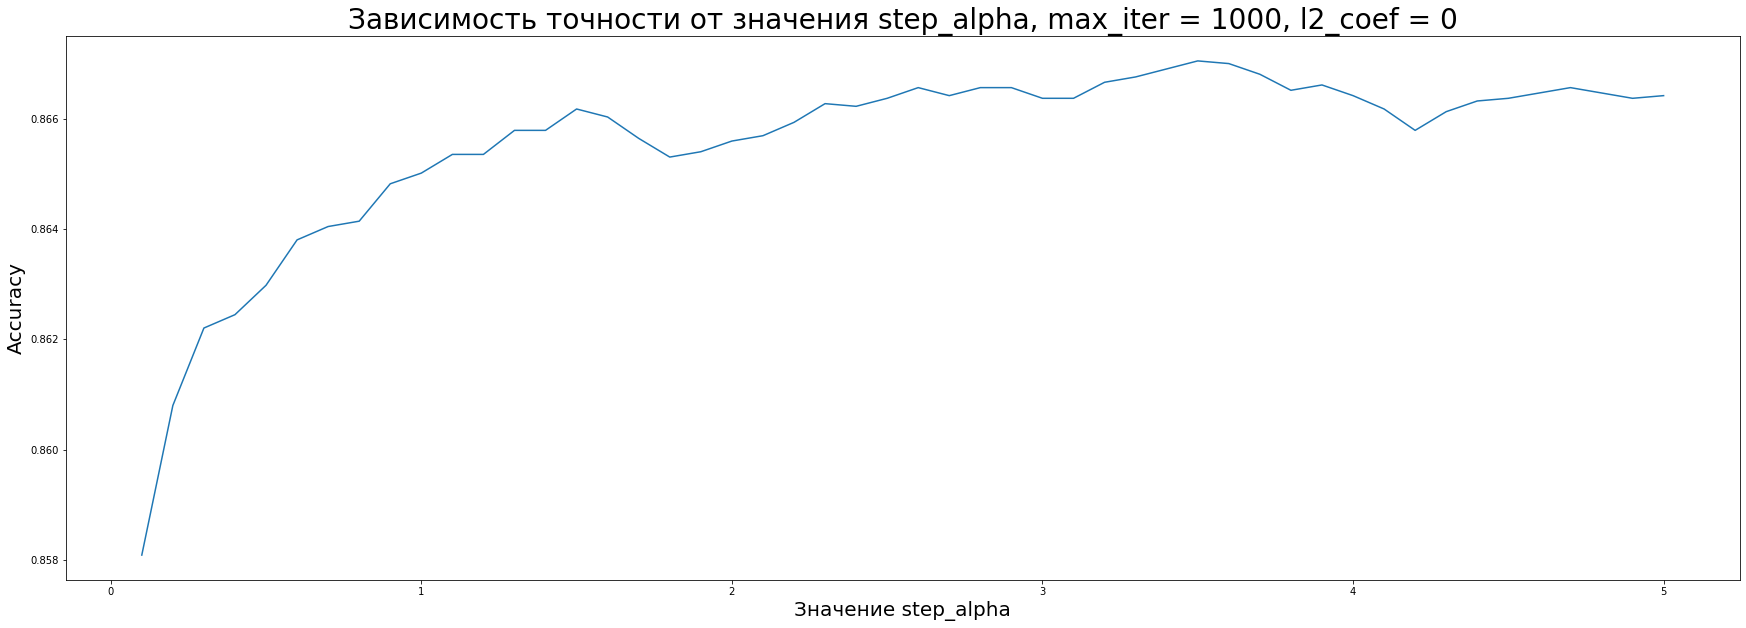

In [10]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,51) * 0.1, accuracy_alpha)
plt.title("Зависимость точности от значения step_alpha, max_iter = 1000, l2_coef = 0", fontsize=28)
plt.xlabel("Значение step_alpha", fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

plt.savefig("Images/step_alpha_acc.png")

plt.show()

In [12]:
np.argmax(accuracy_alpha), max(accuracy_alpha)

(34, 0.8670439156509964)

In [13]:
time_34 = np.cumsum(holder_alpha[34]['time'])
func_34 = holder_alpha[34]['func']

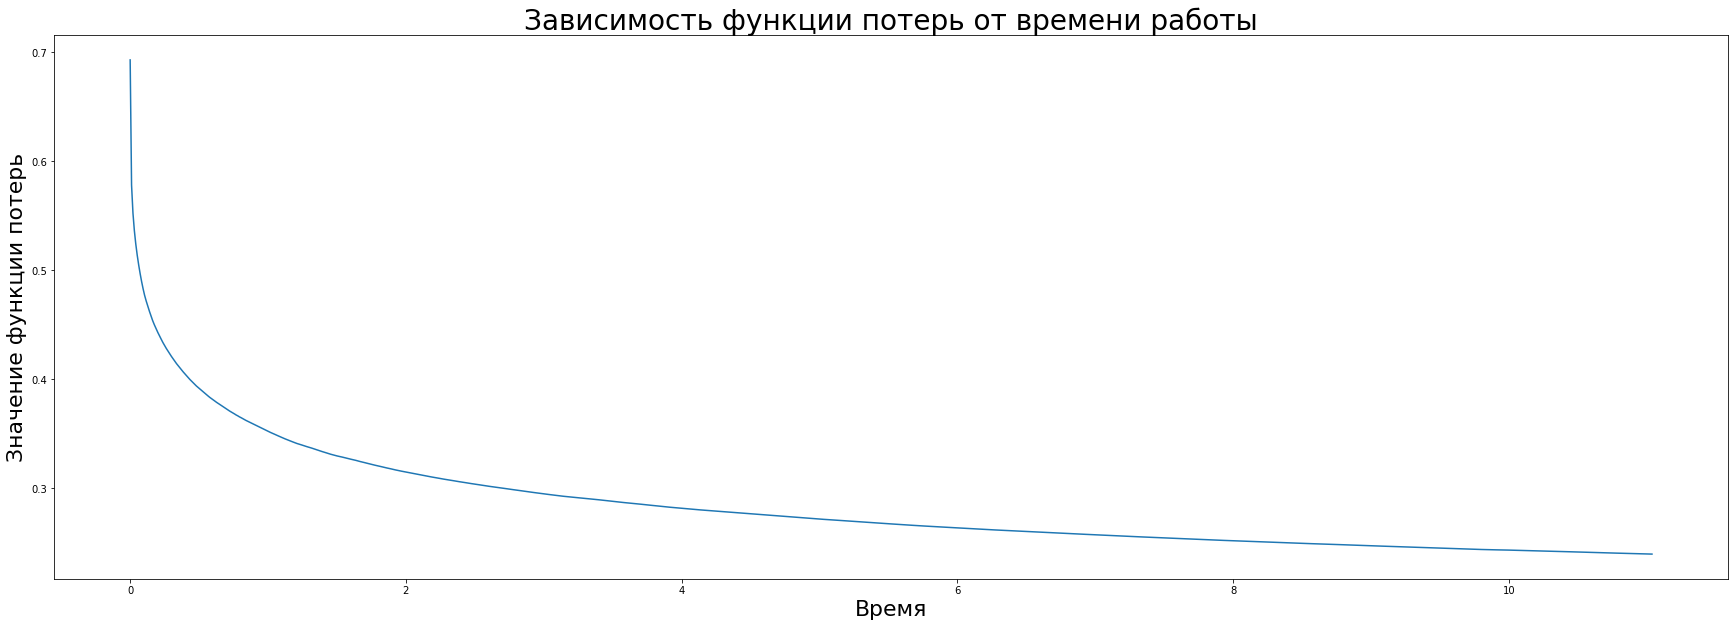

In [14]:
fig = plt.figure(figsize=[30, 10])

plt.plot(time_34, func_34)
plt.title("Зависимость функции потерь от времени работы", fontsize=28)
plt.xlabel("Время", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)

plt.savefig("Images/step_alpha_err_time.png")

plt.show()

In [15]:
w_list_a = holder_alpha[34]['w']

In [19]:
predicts = [predict(test_matrix, item) for item in w_list_a]

In [20]:
acc = [accuracy_score(test_target, pred) for pred in predicts]

In [22]:
times = np.cumsum(holder_alpha[34]['time'])

In [23]:
func = holder_alpha[34]['func']

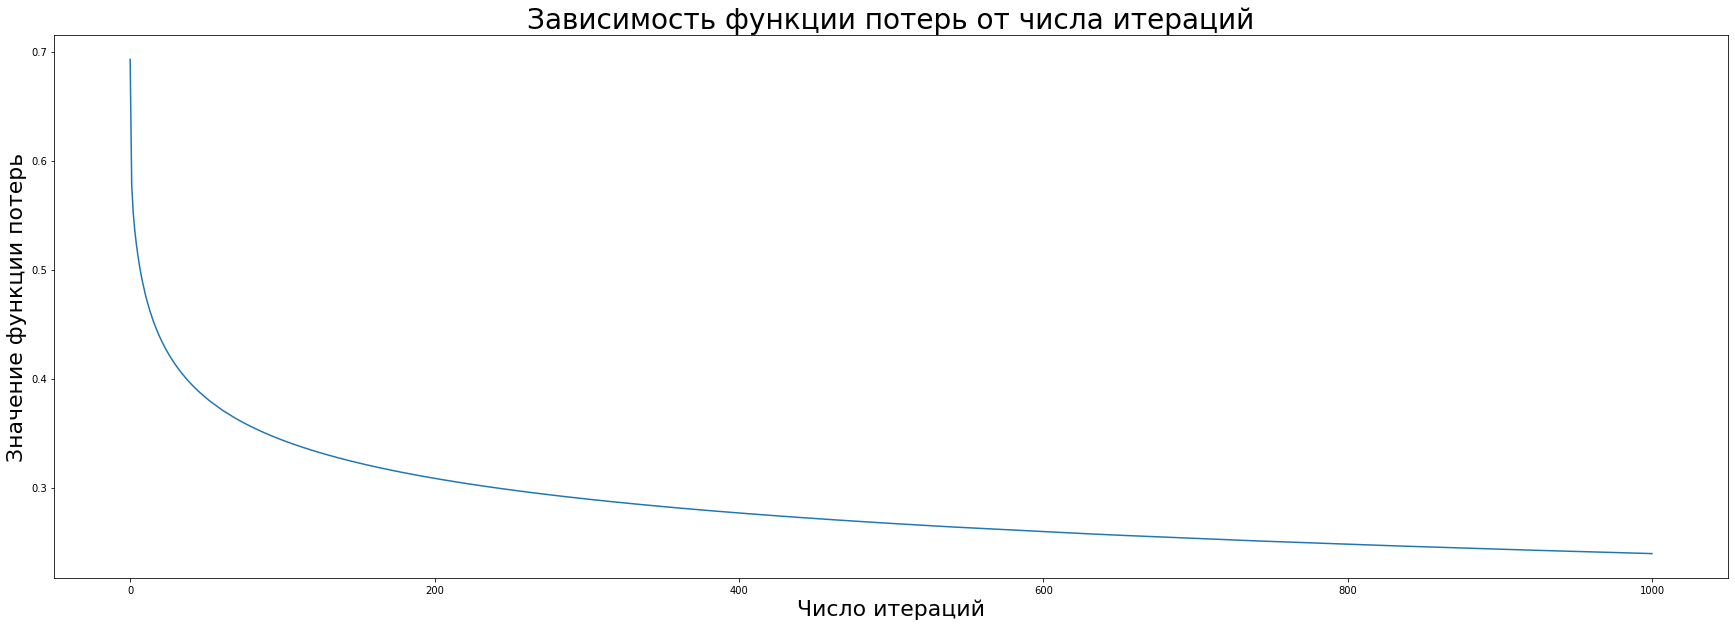

In [24]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1001), func)
plt.title("Зависимость функции потерь от числа итераций", fontsize=28)
plt.xlabel("Число итераций", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)

plt.savefig("Images/step_alpha_err_iter.png")

plt.show()

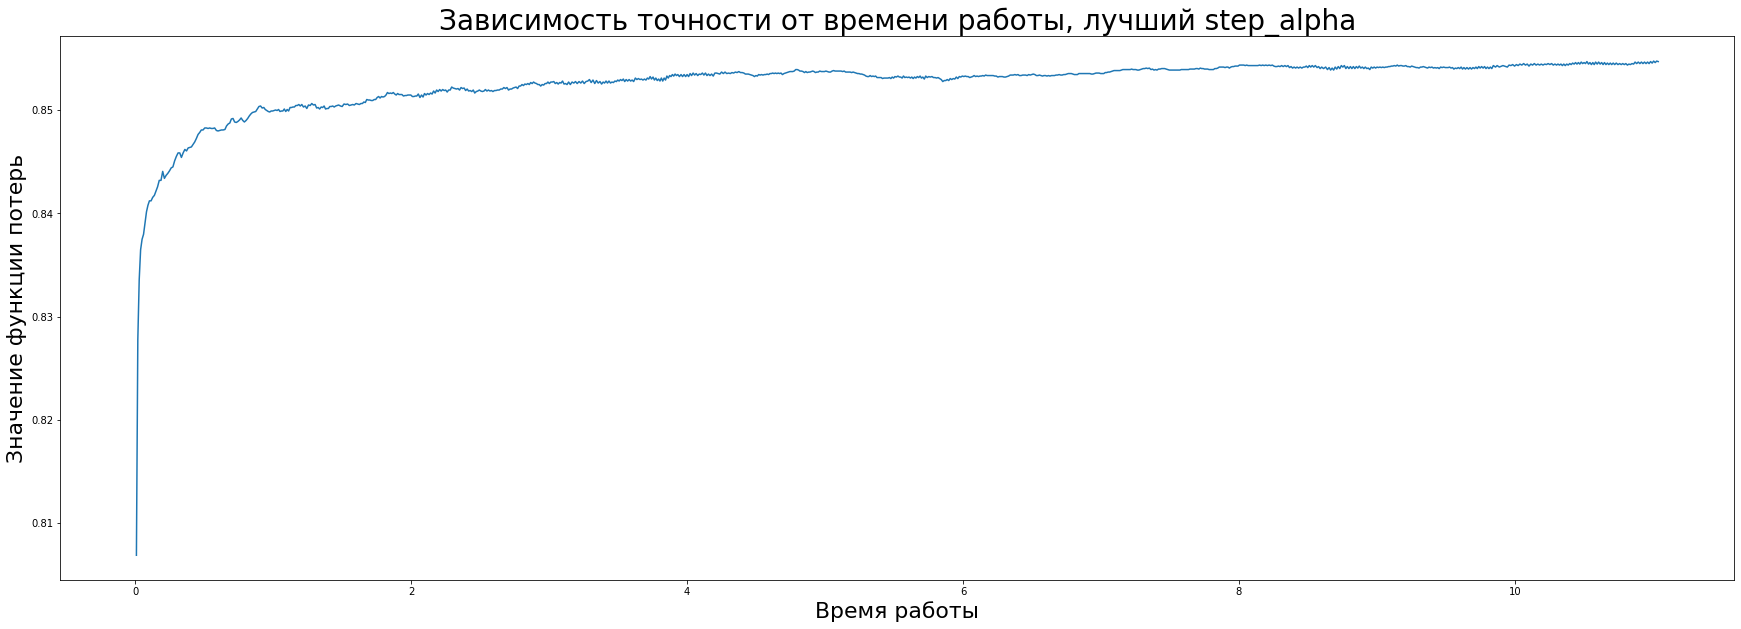

In [25]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], acc[1:])
plt.title("Зависимость точности от времени работы, лучший step_alpha", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/step_alpha_acc_time.png")

plt.show()

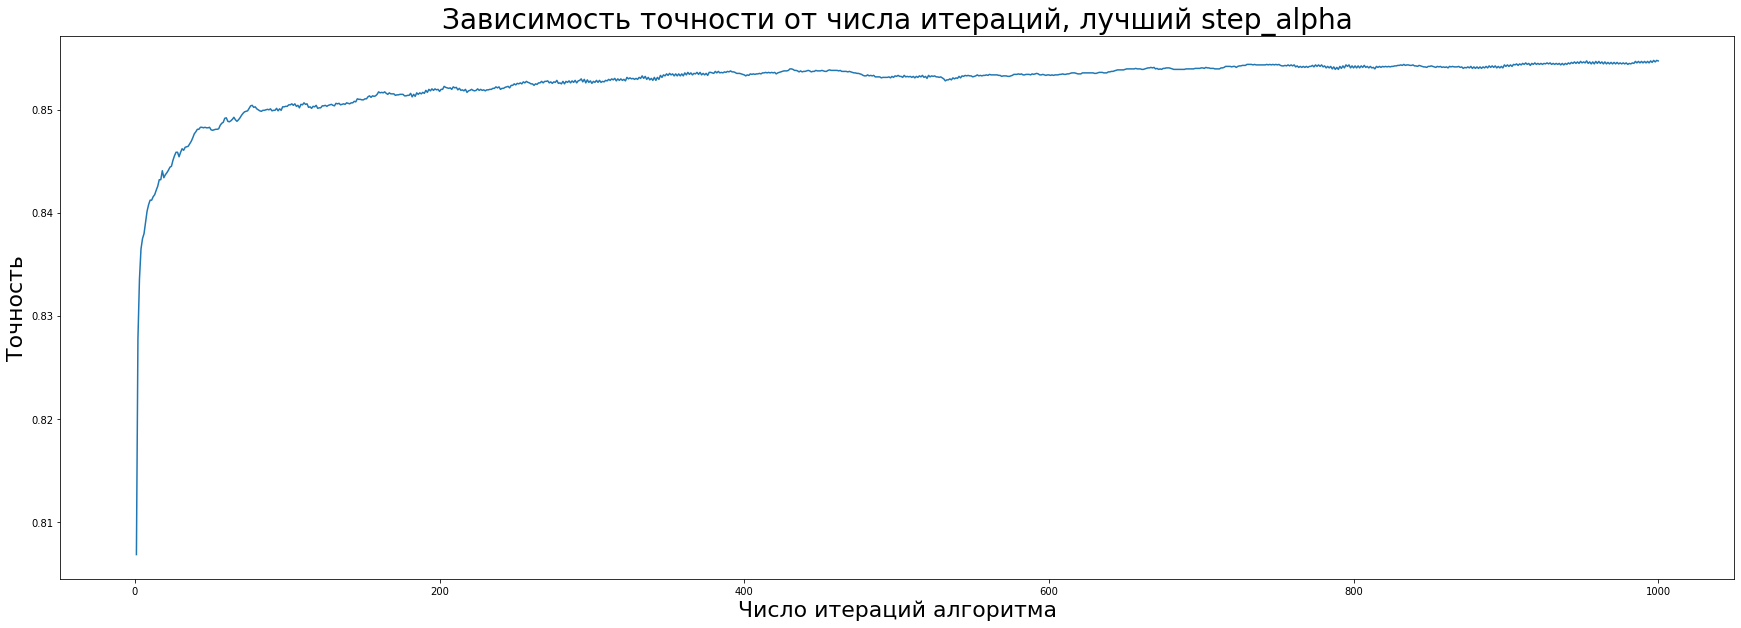

In [26]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,1001), acc[1:])
plt.title("Зависимость точности от числа итераций, лучший step_alpha", fontsize=28)
plt.xlabel("Число итераций алгоритма", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/step_alpha_acc_iter.png")

plt.show()

Рассмотрим оценку step_beta

In [27]:
res_beta = []
holder_beta = []
for i in range(50):
    classifier = GDClassifier(step_alpha = 3.4, step_beta = i / 10, l2_coef = 0)
    holder_beta.append(classifier.fit(train_matrix, train_target, trace = True))
    res_beta.append(classifier.predict(test_matrix))

In [28]:
accuracy_beta = [accuracy_score(test_target, res) for res in res_beta]

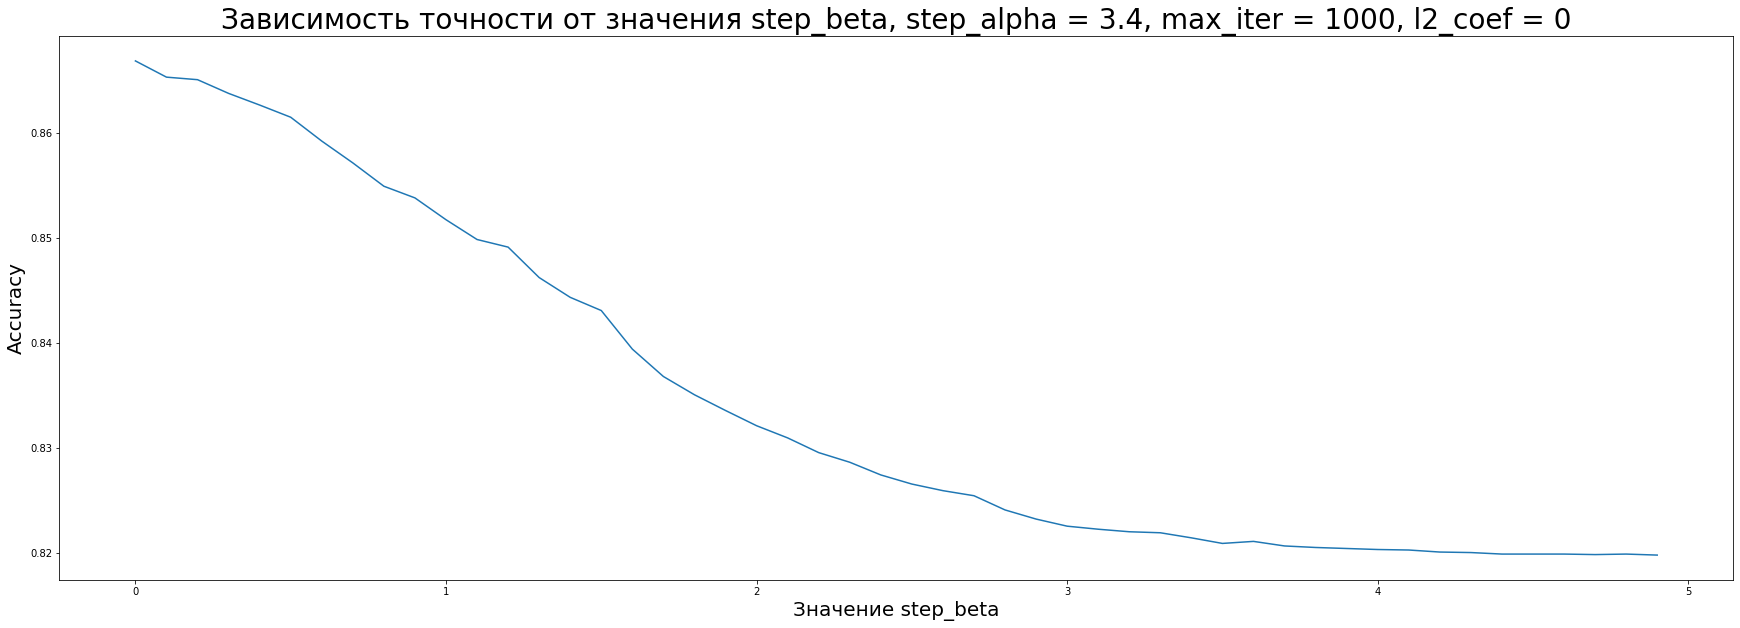

In [29]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(0, 50) * 0.1, accuracy_beta)
plt.title("Зависимость точности от значения step_beta, step_alpha = 3.4, max_iter = 1000, l2_coef = 0", fontsize=28)
plt.xlabel("Значение step_beta", fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

plt.savefig("Images/step_beta_acc.png")

plt.show()

Т.к. точность падает при увеличении step_beta, для различия в графиках возьмём случайное значение step_beta, например - 1.7

In [30]:
w_list = holder_beta[14]['w']

In [31]:
predicts_beta = [predict(test_matrix, item) for item in w_list]

In [32]:
acc_b = [accuracy_score(test_target, val) for val in predicts_beta]

In [33]:
times = np.cumsum(holder_beta[14]['time'])

In [34]:
acc_b.__len__()

180

In [35]:
func_b = holder_beta[14]['func']

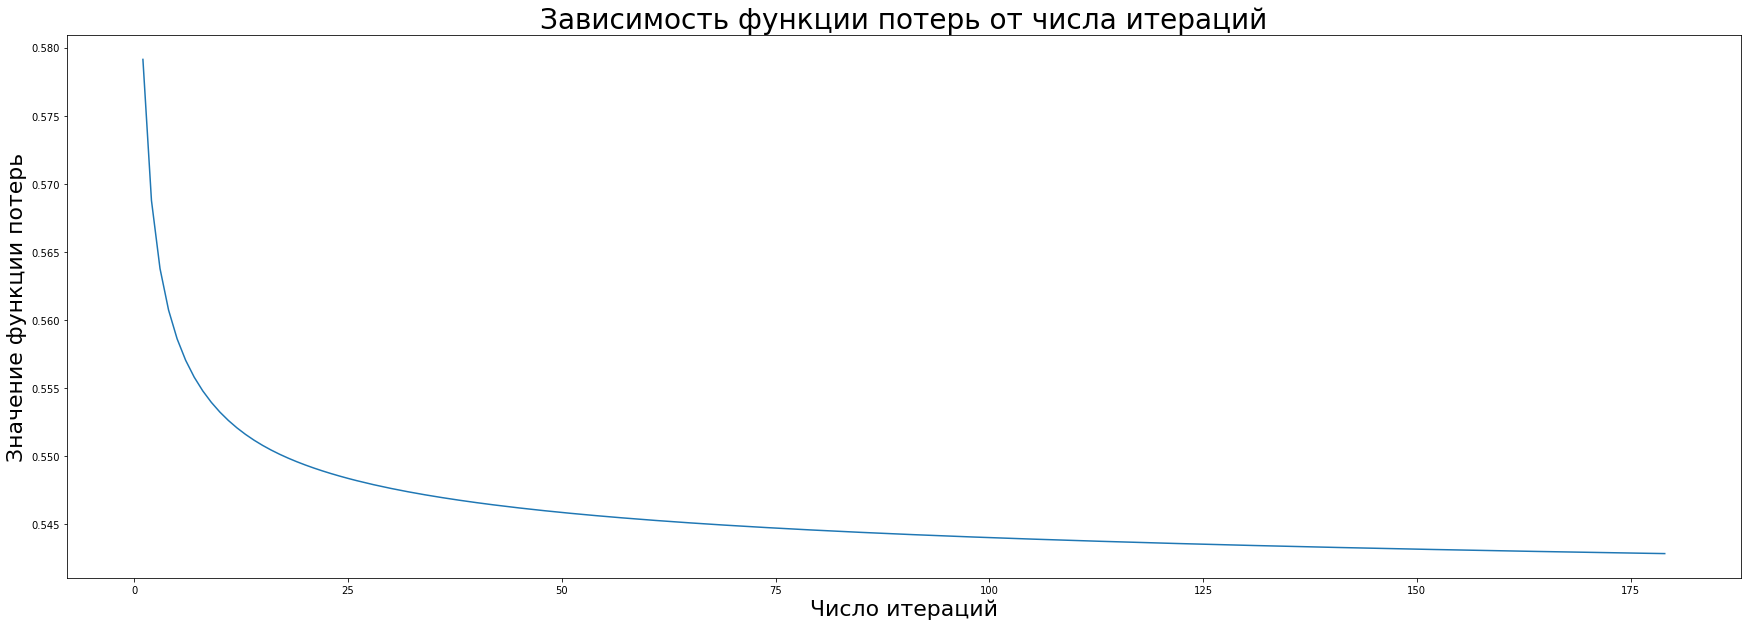

In [36]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, acc_b.__len__()), func_b[1:])
plt.title("Зависимость функции потерь от числа итераций", fontsize = 28)
plt.xlabel("Число итераций", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/step_beta_func_iter.png")

plt.show()

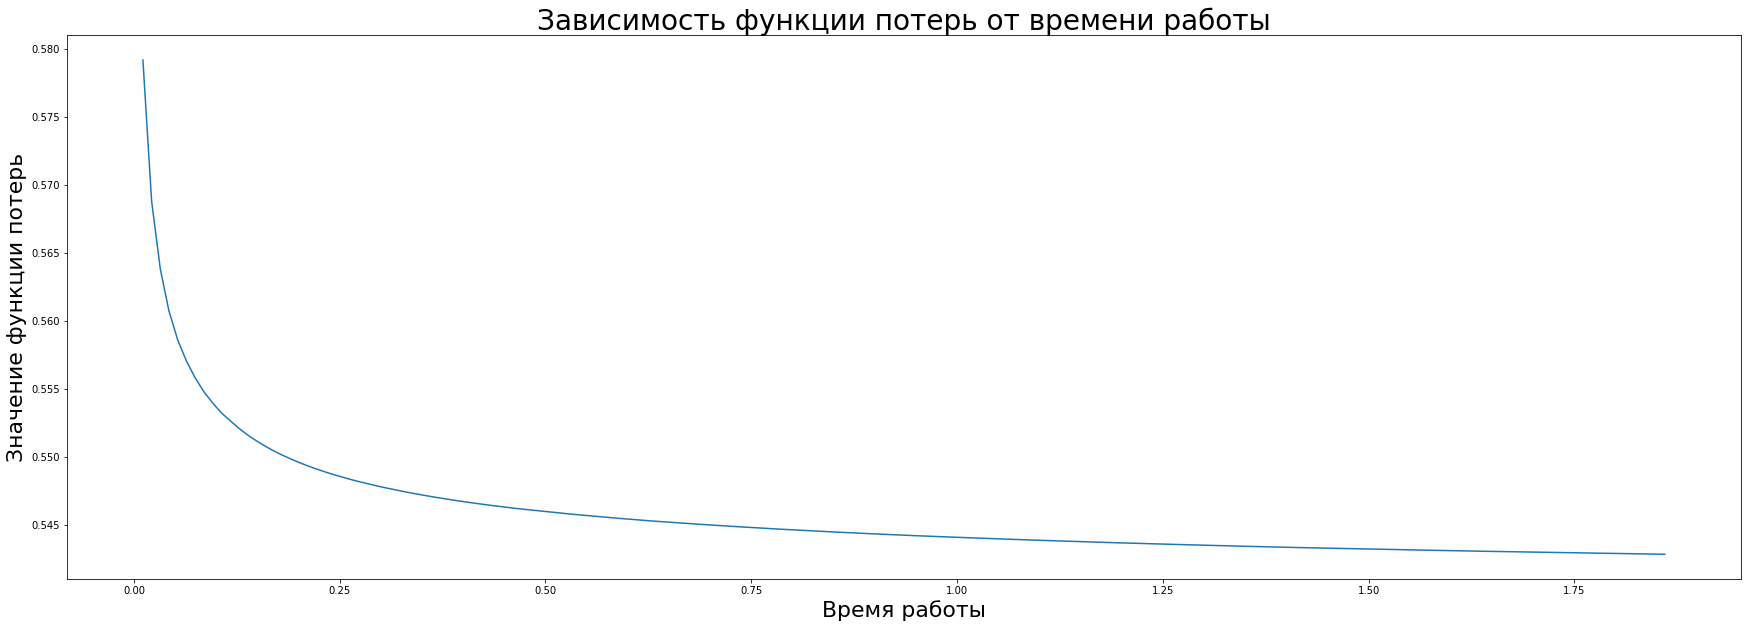

In [37]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], func_b[1:])
plt.title("Зависимость функции потерь от времени работы", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Значение функции потерь", fontsize = 22)
 
plt.savefig("Images/step_beta_func_time.png")

plt.show()

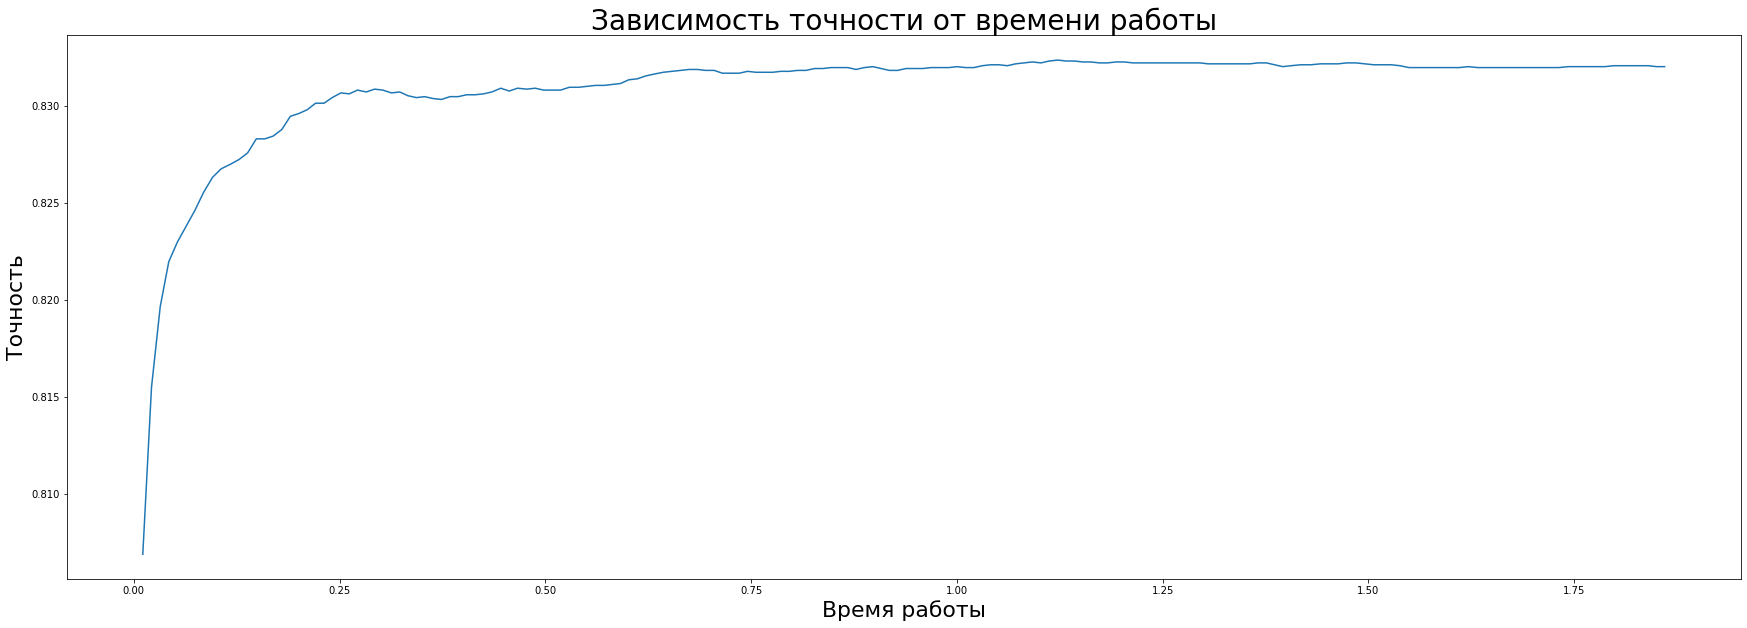

In [38]:
fig = plt.figure(figsize=[30, 10])

plt.plot(times[1:], acc_b[1:])
plt.title("Зависимость точности от времени работы", fontsize = 28)
plt.xlabel("Время работы", fontsize = 22)
plt.ylabel("Точность", fontsize = 22)
 
plt.savefig("Images/step_beta_acc_time.png")

plt.show()

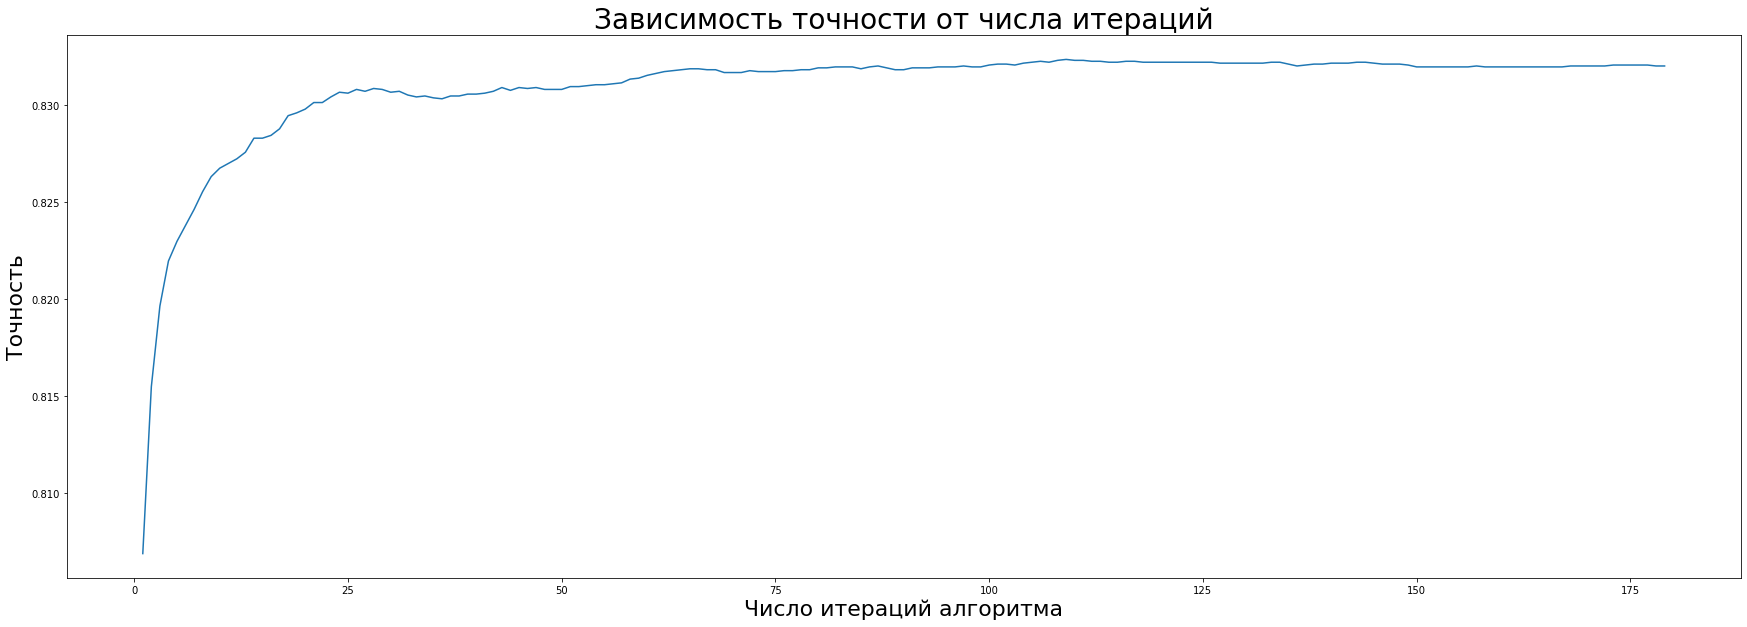

In [39]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,acc_b.__len__()), acc_b[1:])
plt.title("Зависимость точности от числа итераций", fontsize=28)
plt.xlabel("Число итераций алгоритма", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/step_beta_acc_iter.png")

plt.show()

Как видно, последние 2 графика опять примерно одинаковы

In [39]:
from time import time

In [40]:
w = np.zeros(train_matrix.shape[1])
res_w = []
w_s = []
times_w = []
for k in range(500):
    time_now = time()
    classifier = GDClassifier(step_alpha = 3.4, tolerance = -1, max_iter = 100, l2_coef = 0)
    classifier.fit(train_matrix, train_target, w_0 = w)
    res_w.append(classifier.predict(test_matrix))
    w = classifier.get_weights()
    w_s.append(w)
    times_w.append(time() - time_now)

In [41]:
accuracy_w = [accuracy_score(test_target, res) for res in res_w]

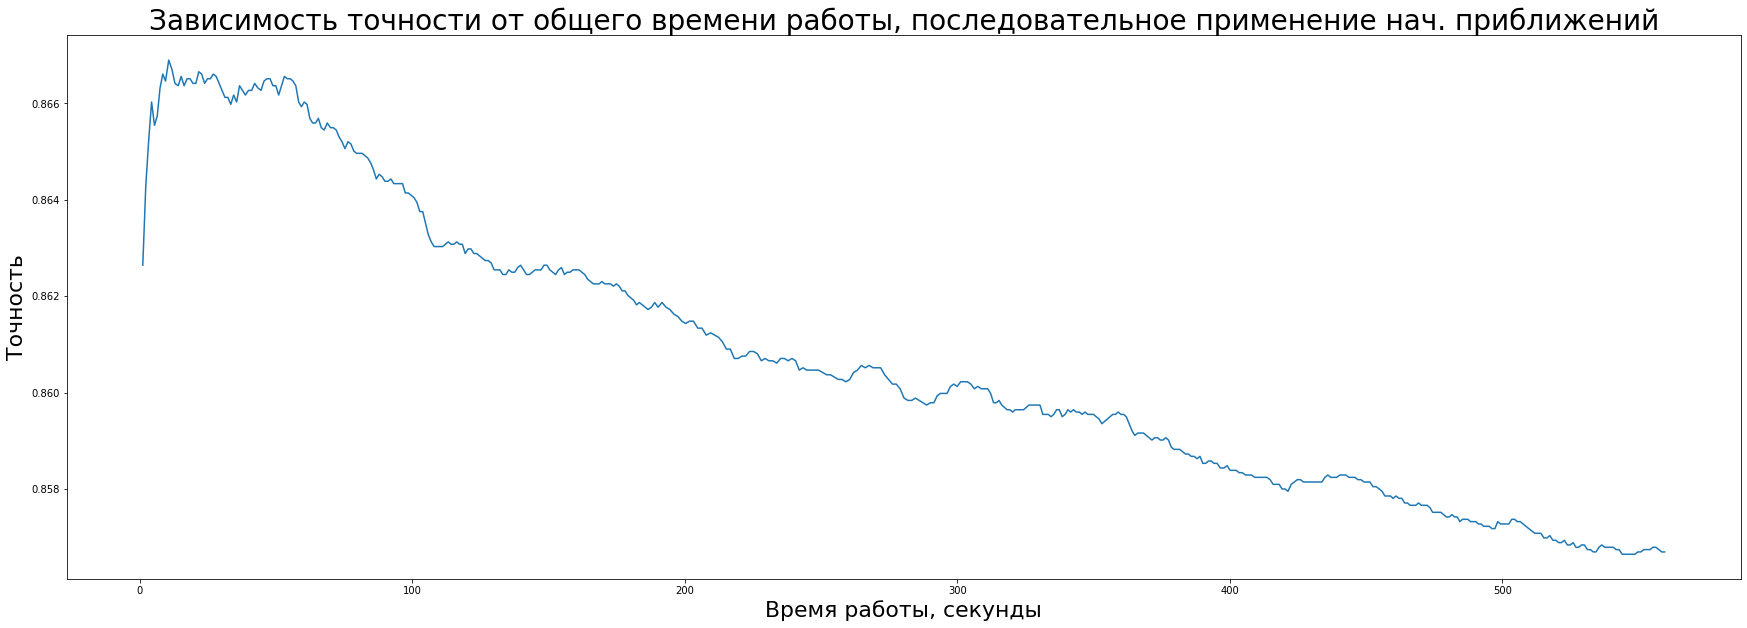

In [42]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.cumsum(times_w), accuracy_w)
plt.title("Зависимость точности от общего времени работы, последовательное применение нач. приближений", fontsize=28)
plt.xlabel("Время работы, секунды", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/start_closure_time.png")

plt.show()

In [43]:
from oracles import BinaryLogistic

In [44]:
oracle = BinaryLogistic()

In [45]:
loss_f = [oracle.func(train_matrix, train_target, w) for w in w_s]

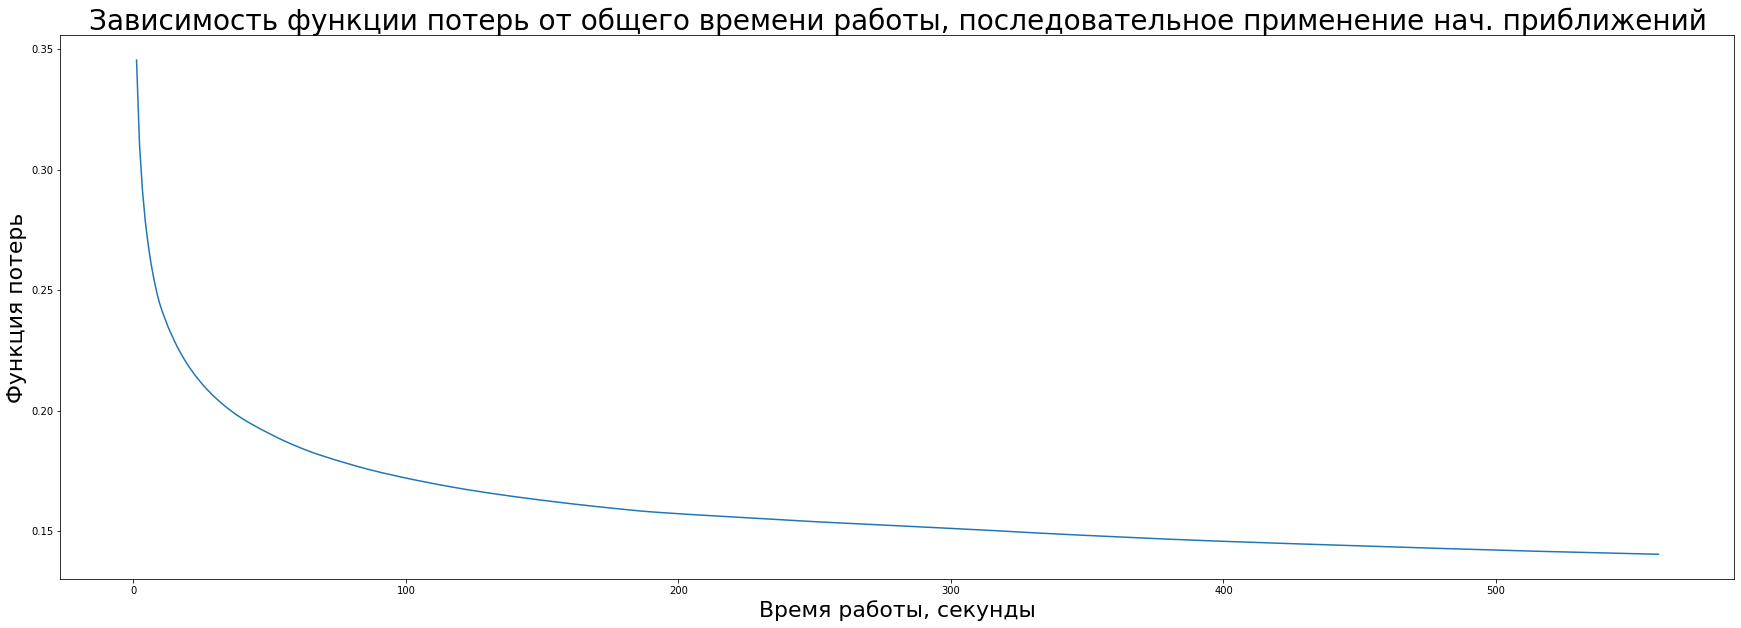

In [46]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.cumsum(times_w), loss_f)
plt.title("Зависимость функции потерь от общего времени работы, последовательное применение нач. приближений", fontsize=28)
plt.xlabel("Время работы, секунды", fontsize = 22)
plt.ylabel("Функция потерь", fontsize = 22)

plt.savefig("Images/start_closure_func.png")

plt.show()

In [47]:
max(accuracy_w)

0.8668988198877926